In [222]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [223]:
# loading the dataset
ds = pd.read_csv(r'C:\Users\jayak\OneDrive\Desktop\Data Analytics\Regression Model\mushrooms.csv')

In [224]:
# checking for null values
ds.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [225]:
ds.head(20)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      p         x           s         n       t    p               f   
1      e         x           s         y       t    a               f   
2      e         b           s         w       t    l               f   
3      p         x           y         w       t    p               f   
4      e         x           s         g       f    n               f   
5      e         x           y         y       t    a               f   
6      e         b           s         w       t    a               f   
7      e         b           y         w       t    l               f   
8      p         x           y         w       t    p               f   
9      e         b           s         y       t    a               f   
10     e         x           y         y       t    l               f   
11     e         x           y         y       t    a               f   
12     e         b           s         y       t    a               f   
13     p         x           y         w       t    p               f   
14     e         x           f         n       f    n               f   
15     e         s           f         g       f    n               f   
16     e         f           f         w       f    n               f   
17     p         x           s         n       t    p               f   
18     p         x           y         w       t    p               f   
19     p         x           s         n       t    p               f   

   gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0             c         n          k  ...                        s   
1             c         b          k  ...                        s   
2             c         b          n  ...                        s   
3             c         n          n  ...                        s   
4             w         b          k  ...                        s   
5             c         b          n  ...                        s   
6             c         b          g  ...                        s   
7             c         b          n  ...                        s   
8             c         n          p  ...                        s   
9             c         b          g  ...                        s   
10            c         b          g  ...                        s   
11            c         b          n  ...                        s   
12            c         b          w  ...                        s   
13            c         n          k  ...                        s   
14            w         b          n  ...                        f   
15            c         n          k  ...                        s   
16            w         b          k  ...                        s   
17            c         n          n  ...                        s   
18            c         n          n  ...                        s   
19            c         n          k  ...                        s   

   stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                       w                      w         p          w   
1                       w                      w         p          w   
2                       w                      w         p          w   
3                       w                      w         p          w   
4                       w                      w         p          w   
5                       w                      w         p          w   
6                       w                      w         p          w   
7                       w                      w         p          w   
8                       w                      w         p          w   
9                       w                      w         p          w   
10                      w                      w         p          w   
11                      w                      w         p          w   
12                      w                      w 

In [226]:
ds.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [229]:
# converting the data into numerical form using labelencoder
label_encoders = {}
for column in ds.columns:
    label_encoders[column] = LabelEncoder()
    ds[column] = label_encoders[column].fit_transform(ds[column])


In [230]:
ds.head(20)

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0       1          5            2          4        1     6                1   
1       0          5            2          9        1     0                1   
2       0          0            2          8        1     3                1   
3       1          5            3          8        1     6                1   
4       0          5            2          3        0     5                1   
5       0          5            3          9        1     0                1   
6       0          0            2          8        1     0                1   
7       0          0            3          8        1     3                1   
8       1          5            3          8        1     6                1   
9       0          0            2          9        1     0                1   
10      0          5            3          9        1     3                1   
11      0          5            3          9        1     0                1   
12      0          0            2          9        1     0                1   
13      1          5            3          8        1     6                1   
14      0          5            0          4        0     5                1   
15      0          4            0          3        0     5                1   
16      0          2            0          8        0     5                1   
17      1          5            2          4        1     6                1   
18      1          5            3          8        1     6                1   
19      1          5            2          4        1     6                1   

    gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0              0          1           4  ...                         2   
1              0          0           4  ...                         2   
2              0          0           5  ...                         2   
3              0          1           5  ...                         2   
4              1          0           4  ...                         2   
5              0          0           5  ...                         2   
6              0          0           2  ...                         2   
7              0          0           5  ...                         2   
8              0          1           7  ...                         2   
9              0          0           2  ...                         2   
10             0          0           2  ...                         2   
11             0          0           5  ...                         2   
12             0          0          10  ...                         2   
13             0          1           4  ...                         2   
14             1          0           5  ...                         0   
15             0          1           4  ...                         2   
16             1          0           4  ...                         2   
17             0          1           5  ...                         2   
18             0          1           5  ...                         2   
19             0          1           4  ...                         2   

    stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                        7                       7          0           2   
1                        7                       7          0           2   
2                        7                       7          0           2   
3                        7                       7          0           2   
4                        7                       7          0           2   
5                        7                       7          0           2   
6                        7                       7          0           2   
7                        7                       7          0           2   
8                        7                       7          0           2  

In [231]:
# assgning the features and target variable
X = ds.drop('class',axis=1)
y = ds['class']

In [232]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [233]:
# Creating the model and fitting the data
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [234]:
# predicting the values
y_pred = tree.predict(X_test)

In [235]:
# printing the accuracy score, classification report and confusion matrix
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy score: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<Axes: >

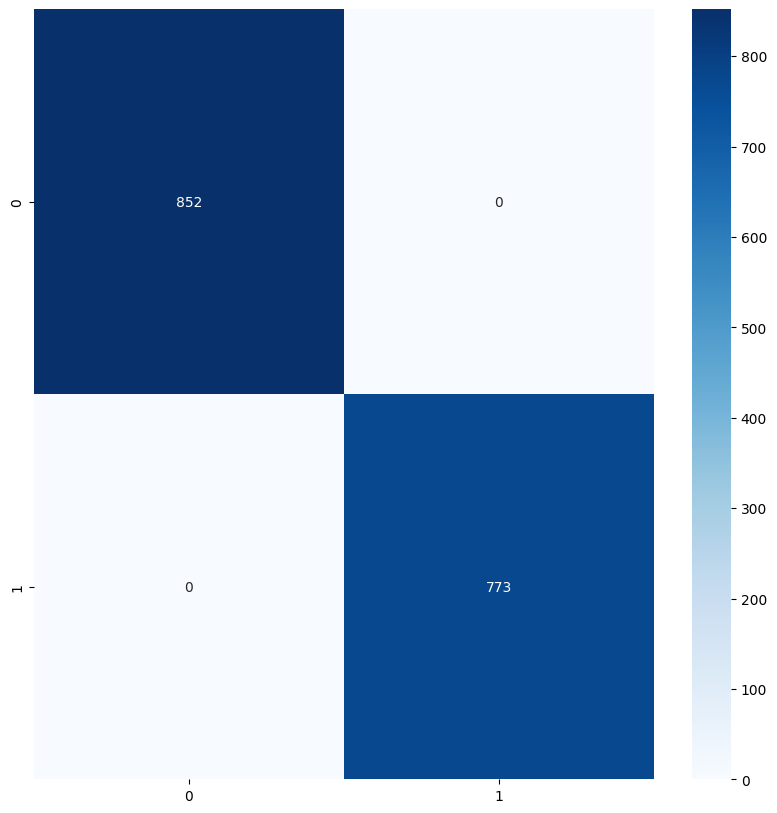

In [236]:
# plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot = True,fmt='d',cmap='Blues')